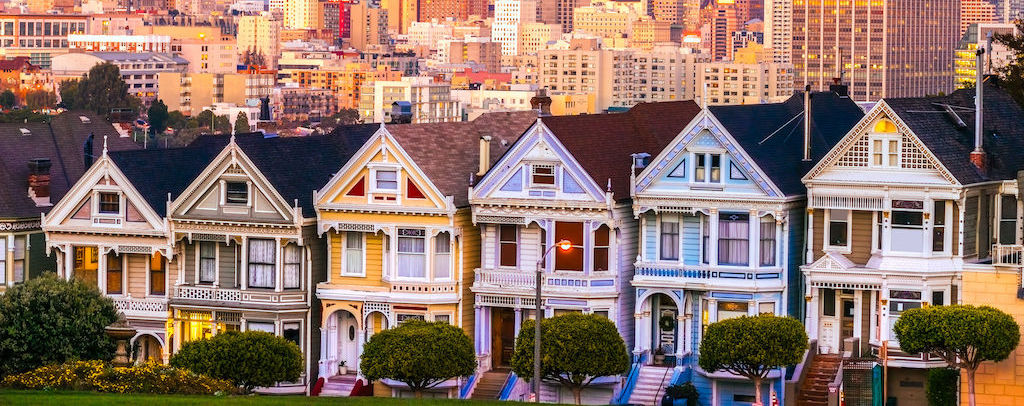

# DESCRIPTION

<br><b>Background of Problem Statement:</b><br>
The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and non-functional requirements for it.<br>

<br><b>Problem Objective:</b><br>
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.
Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.<br>

<b>Domain:</b> Finance and Housing

<b>Analysis Tasks to be performed:</b><br>
&emsp;&emsp;&emsp;1. Build a model of housing prices to predict median house values in California using the provided dataset.<br>
&emsp;&emsp;&emsp;2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.<br>
&emsp;&emsp;&emsp;3. Predict housing prices based on median_income and plot the regression chart for it.<br><br>

1. <b>Load the data:</b><br>
&emsp;&emsp;&emsp;•	Read the “housing.csv” file from the folder into the program.<br>
&emsp;&emsp;&emsp;•	Print first few rows of this data.<br>
&emsp;&emsp;&emsp;•	Extract input (X) and output (Y) data from the dataset.<br><br>

2. <b>Handle missing values:</b><br>
&emsp;&emsp;&emsp;•	Fill the missing values with the mean of the respective column.<br><br>

3. <b>Encode categorical data:</b><br>
&emsp;&emsp;&emsp;•	Convert categorical column in the dataset to numerical data.<br><br>

4. <b>Split the dataset: </b><br>
&emsp;&emsp;&emsp;•	Split the data into 80% training dataset and 20% test dataset.<br><br>

5. <b>Standardize data:</b><br>
&emsp;&emsp;&emsp;•	Standardize training and test datasets.<br><br>
6. <b>Perform Linear Regression :</b> <br>
&emsp;&emsp;&emsp;•	Perform Linear Regression on training data.<br>
&emsp;&emsp;&emsp;•	Predict output for test dataset using the fitted model.<br>
&emsp;&emsp;&emsp;•	Print root mean squared error (RMSE) from Linear Regression<br>
&emsp;&emsp;&emsp;•	 [ HINT: Import mean_squared_error from sklearn.metrics ]<br><br>

7. <b>Bonus exercise: Perform Linear Regression with one independent variable :</b><br>
&emsp;&emsp;&emsp;•	Extract just the median_income column from the independent variables (from X_train and X_test).<br>
&emsp;&emsp;&emsp;•	Perform Linear Regression to predict housing values based on median_income.<br>
&emsp;&emsp;&emsp;•	Predict output for test dataset using the fitted model.<br>
&emsp;&emsp;&emsp;•	Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.<br><br><br>
<b>Dataset Description :</b><br>
Field	Description<br>
&emsp;&emsp;&emsp;<i>longitude	(signed numeric - float) : Longitude value for the block in California, USA</i><br>
&emsp;&emsp;&emsp;<i>latitude	(numeric - float ) : Latitude value for the block in California, USA</i><br>
&emsp;&emsp;&emsp;<i>housing_median_age	(numeric - int ) : Median age of the house in the block</i><br>
&emsp;&emsp;&emsp;<i>total_rooms	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block</i><br>
&emsp;&emsp;&emsp;<i>total_bedrooms	(numeric - float ) : Count of the total number of bedrooms in all houses in the block</i><br>
&emsp;&emsp;&emsp;<i>population	(numeric - int ) : Count of the total number of population in the block</i><br>
&emsp;&emsp;&emsp;<i>households	(numeric - int ) : Count of the total number of households in the block</i><br>
&emsp;&emsp;&emsp;<i>median_income	(numeric - float ) : Median of the total household income of all the houses in the block</i><br>
&emsp;&emsp;&emsp;<i>ocean_proximity	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', 'OCEAN', 'INLAND', 'NEAR OCEAN', &nbsp;'ISLAND']</i><br>
&emsp;&emsp;&emsp;<i>median_house_value	(numeric - int ) : Median of the household prices of all the houses in the block</i><br>
 
<br>
<b> The analysis results to be provided with insights wherever applicable. </b><br><br>



# Load the Data - Read file, View first few rows, Extract Input & Output

In [1]:
import numpy as np
import pandas as pd
data_set = pd.read_excel("C:/Users/VAIO/Downloads/SimpliLearn/DS with Python/Assessment/California House Pricing/California_House_Pricing.xlsx")
data_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


<b>Inference: We can see that the data set has only one categorial variable 'ocean_proximity' present. Which we would require to encoded for further analysis</b>

In [2]:
# View the information, Description and Shape of the dataset

In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
data_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
data_set.shape

(20640, 10)

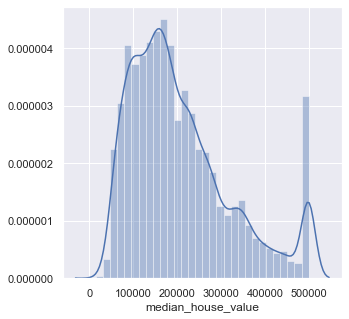

In [6]:
# Visualize the distribution of the median price of house in the districts
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(data_set['median_house_value'], bins=30)
plt.show()

<b>Inference: Above graph respresents that the 'median_house_value' is skewed towards right. This tells us, there are some outliners present in the right side. Also the mean of the feature is grater than the media.</b>

(9.5, -0.5)

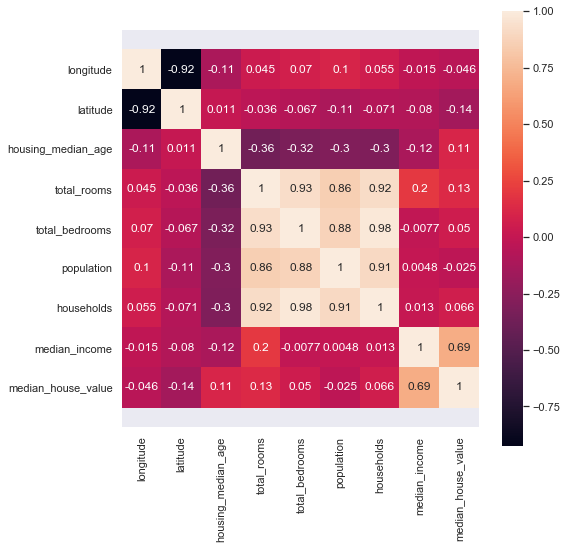

In [7]:
# Visualize the co-relation between the coefiicients
california_corr = data_set.corr()
plt.subplots(figsize=(8,8))
ax = sns.heatmap(california_corr,square=True,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [8]:
# Extracting the Input data (X) and Output data (Y)
X = data_set.iloc[:,0:9]
Y = data_set['median_house_value']

In [9]:
# View the rows and columns in X and Y
X.shape, Y.shape

((20640, 9), (20640,))

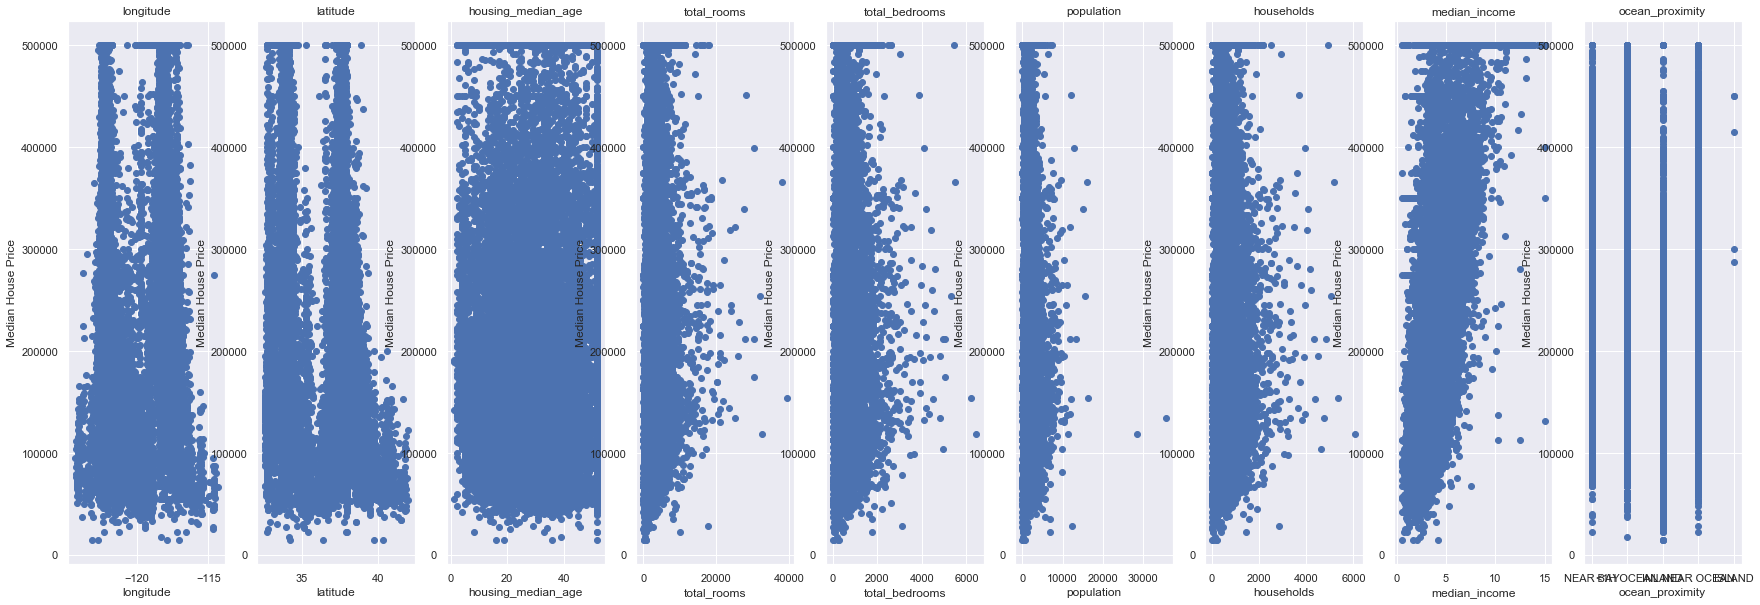

In [10]:
# Visualize the relation of each input feature with output feature using scatter plot
plt.figure(figsize=(30, 10))
Features = X.columns

for i, col in enumerate(Features):
    plt.subplot(1, len(Features) , i+1)
    x = data_set[col]
    y = Y
    plt.scatter(x, y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Median House Price')

# Handle missing values

In [11]:
# Finding out if any column has Nan or null values in the data set
X.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

<b>Inference:</b> There is only one feature in the whole data set which has missing values present in it. Feature name - 'total_bedrooms'

<b><i>We will be using SimpleImputer function from Impute package, to check the missing values for all feature except the categorial data. The mean is taken for each column, and the missing values for the columns are filled with the respective mean value.</i></b>

In [12]:
# Fill the NaN values with the average of the coulum (NOTE: We are doing it only for column have interger values)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X.iloc[:,:-1])
X.iloc[:,:-1] = imputer.transform(X.iloc[:,:-1])

We will be using Imputer function to check the messing values for all feature except the categorial data. The mean is taken for each column, and the missing values for the columns are filled with the respective mean value.

In [13]:
# Verify if the NaN value has been replaced by the average of the column value
X.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

<b>Observation:</b> As we can see from above results that the missing values have been filled with the mean value of the column.

# Encode categorical data

<b><i> Encoding the categorical data using OneHotEncoder </i></b>

In [14]:
# Converting the Categorical value into Numbers using OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[8])],remainder='passthrough')
X = ct.fit_transform(X)

In [15]:
X.shape

(20640, 13)

In [16]:
# View the encoded (numpy array) categorical data by converting it to Data Frame
X_Frame = pd.DataFrame(X, columns =["0","1","2","3","4","longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"])
X_Frame.head()

,0,1,2,3,4,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


<b>Observation:</b> The categorical data was successfully handled using the OneHotEncoder

# Split the dataset

In [17]:
# Splitting the data in 80-20 ratio with random_state value as 20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.20, random_state=20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 13), (4128, 13), (16512,), (4128,))

# Standardizing the data: Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,5:] = sc.fit_transform(x_train[:,5:])
x_test[:,5:] = sc.transform(x_test[:,5:])

In [19]:
# Convert the numpy array to Data Frame to view the features description of x_train
X_Train_Frame = pd.DataFrame(x_train, columns =["0","1","2","3","4","longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"])
X_Train_Frame.head()

,0,1,2,3,4,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.0,0.0,0.0,0.0,0.0,0.718815,-0.800679,-0.049918,0.205997,0.786418,0.462297,0.883218,-0.726070
1,0.0,0.0,0.0,0.0,1.0,1.184006,-1.306996,0.267283,-0.275105,-0.343962,-0.391134,-0.289829,-0.322943
2,0.0,0.0,0.0,0.0,1.0,0.673796,-0.852249,0.980984,-0.882056,-0.892316,-0.741376,-0.831640,-0.043838
3,1.0,0.0,0.0,0.0,0.0,0.613772,-0.744422,1.060284,-0.438569,-0.425734,-0.392944,-0.426597,-0.669481
4,1.0,0.0,0.0,0.0,0.0,0.773838,-0.833496,0.187982,-0.326652,-0.500291,-0.354029,-0.384515,0.773735


<b>Observation:</b> Since the data was not scaled, hence by feature scaling we have standarized the data accross all the columns. This would help improving the prediction.

In [20]:
X_Train_Frame.describe()

,0,1,2,3,4,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,0.443677,0.315952,0.000242,0.111192,0.128937,-1.804606e-13,-4.450769e-14,6.488404e-17,-2.960460e-17,-4.998806e-15,5.364868e-17,2.334565e-17,-9.227121e-15
std,0.496833,0.464908,0.015563,0.314379,0.335140,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.392466e+00,-1.442951e+00,-2.191021e+00,-1.216412e+00,-1.286747e+00,-1.283481e+00,-1.307697e+00,-1.775002e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-1.111939e+00,-7.913031e-01,-8.429192e-01,-5.458414e-01,-5.772531e-01,-5.757579e-01,-5.791457e-01,-6.882738e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,5.387408e-01,-6.412834e-01,2.938216e-02,-2.314532e-01,-2.357340e-01,-2.309464e-01,-2.345961e-01,-1.785737e-01
75%,1.000000,1.000000,0.000000,0.000000,0.000000,7.788396e-01,9.761169e-01,6.637832e-01,2.426831e-01,2.548990e-01,2.722431e-01,2.782831e-01,4.623087e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.539565e+00,2.963879e+00,1.853285e+00,1.704039e+01,1.420908e+01,2.456652e+01,1.468361e+01,5.858102e+00


In [21]:
# Convert the numpy array to Data Frame to view the features description of x_train
X_Test_Frame = pd.DataFrame(x_test, columns =["0","1","2","3","4","longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"])
X_Test_Frame.head()

,0,1,2,3,4,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.0,0.0,0.0,0.0,0.0,0.833862,-0.702229,-0.287818,0.209247,0.767178,1.309393,0.664915,-0.636896
1,1.0,0.0,0.0,0.0,0.0,-1.106937,0.788592,-1.715221,-0.302968,-0.502696,-0.338643,-0.516022,1.243507
2,0.0,0.0,0.0,1.0,0.0,-1.357040,1.018310,0.743083,-0.901560,-0.868266,-0.974870,-0.905284,-0.979328
3,0.0,1.0,0.0,0.0,0.0,-0.951873,0.605756,-0.129218,-0.267675,-0.288645,-0.173025,-0.429227,0.408457
4,0.0,0.0,0.0,1.0,0.0,-1.342034,1.004246,1.853285,-0.737168,-0.762443,-0.849978,-0.747475,-0.365687


# Perform Linear Regression 

In [22]:
# Create object for Linear Regression and fit the data into it
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Find the Coefficient and Intercept of the Line
coefficient = classifier.coef_
intercept = classifier.intercept_
print("The intercept value is: ", intercept, "\n")
print("The coefficient values are: ", coefficient)

The intercept value is:  -1.1577925698238064e+16 

The coefficient values are:  [ 1.15779257e+16  1.15779257e+16  1.15779257e+16  1.15779257e+16
  1.15779257e+16 -5.44770000e+04 -5.57420000e+04  1.33080000e+04
 -8.56122461e+03  2.88875000e+04 -4.95047500e+04  3.39892500e+04
  7.26705000e+04]


In [24]:
# Print the coefficient for each feature 
feature_wise_coeff = list(zip(X_Train_Frame.columns,coefficient))
feature_wise_coeff

[('0', 1.1577925698457518e+16),
 ('1', 1.1577925698418368e+16),
 ('2', 1.1577925698606e+16),
 ('3', 1.157792569845186e+16),
 ('4', 1.1577925698459772e+16),
 ('longitude', -54477.0),
 ('latitude', -55742.0),
 ('housing_median_age', 13308.0),
 ('total_rooms', -8561.224609375),
 ('total_bedrooms', 28887.5),
 ('population', -49504.75),
 ('households', 33989.25),
 ('median_income', 72670.5)]

In [25]:
y_pred = classifier.predict(x_test)
y_predicted = pd.DataFrame(y_pred, columns=['Predicted'])
y_predicted = y_predicted.astype(int)

In [26]:
Observed_Predicted_Table =pd.concat([y_test.reset_index(drop=True),y_predicted],axis=1)
Observed_Predicted_Table.head()

,median_house_value,Predicted
0,117600,141206
1,292200,290636
2,131300,169808
3,265900,214286
4,210200,229974


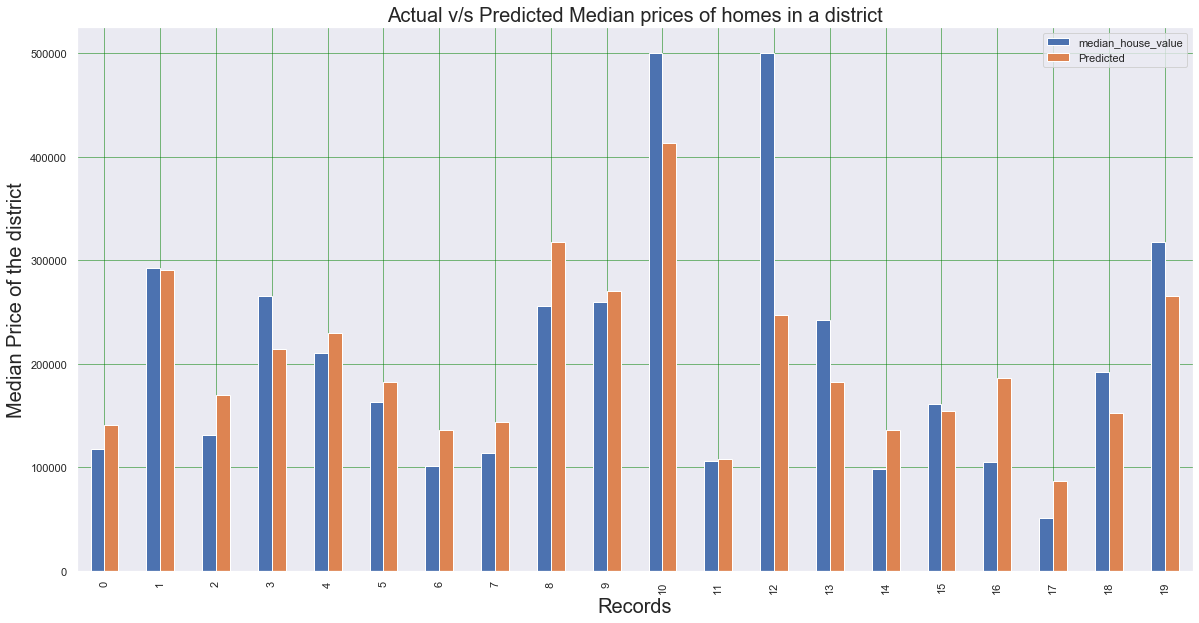

In [27]:
# Visualize the Observed and Predicted values
import matplotlib.pyplot as plt
%matplotlib inline
Observed_Predicted_Table_Split = Observed_Predicted_Table.head(20)
Observed_Predicted_Table_Split.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Records",  fontdict = {'fontsize' : 20})
plt.ylabel("Median Price of the district",  fontdict = {'fontsize' : 20})
plt.title("Actual v/s Predicted Median prices of homes in a district",  fontdict = {'fontsize' : 20})
plt.show()

In [28]:
# Find the Root Mean Squared Error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
rmse

71198.66070920265

# Bonus exercise: Perform Linear Regression with one independent variable 

In [29]:
# Extract the median_income column from the independent variables (from X_train and X_test):
x_train_median_income = X_Train_Frame["median_income"]
x_train_median_income = pd.DataFrame(x_train_median_income)
x_train_median_income.head()

,median_income
0,-0.726070
1,-0.322943
2,-0.043838
3,-0.669481
4,0.773735


In [30]:
x_test_median_income = X_Test_Frame["median_income"]
x_test_median_income = pd.DataFrame(x_test_median_income)
x_test_median_income.head()

,median_income
0,-0.636896
1,1.243507
2,-0.979328
3,0.408457
4,-0.365687


In [31]:
classifier.fit(x_train_median_income,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Predict the value
y_pred_median_income = classifier.predict(x_test_median_income)
y_predicted_median_income = pd.DataFrame(y_pred_median_income, columns=['Predicted'])
y_predicted_median_income = y_predicted_median_income.astype(int)
y_predicted_median_income.head()

,Predicted
0,156751
1,304465
2,129852
3,238868
4,178056


In [33]:
# Create a new Data Frame with Observed and Predicted Value
Observed_Predicted_Table_MI =pd.concat([y_test.reset_index(drop=True),y_predicted_median_income],axis=1)
Observed_Predicted_Table_MI.head()

,median_house_value,Predicted
0,117600,156751
1,292200,304465
2,131300,129852
3,265900,238868
4,210200,178056


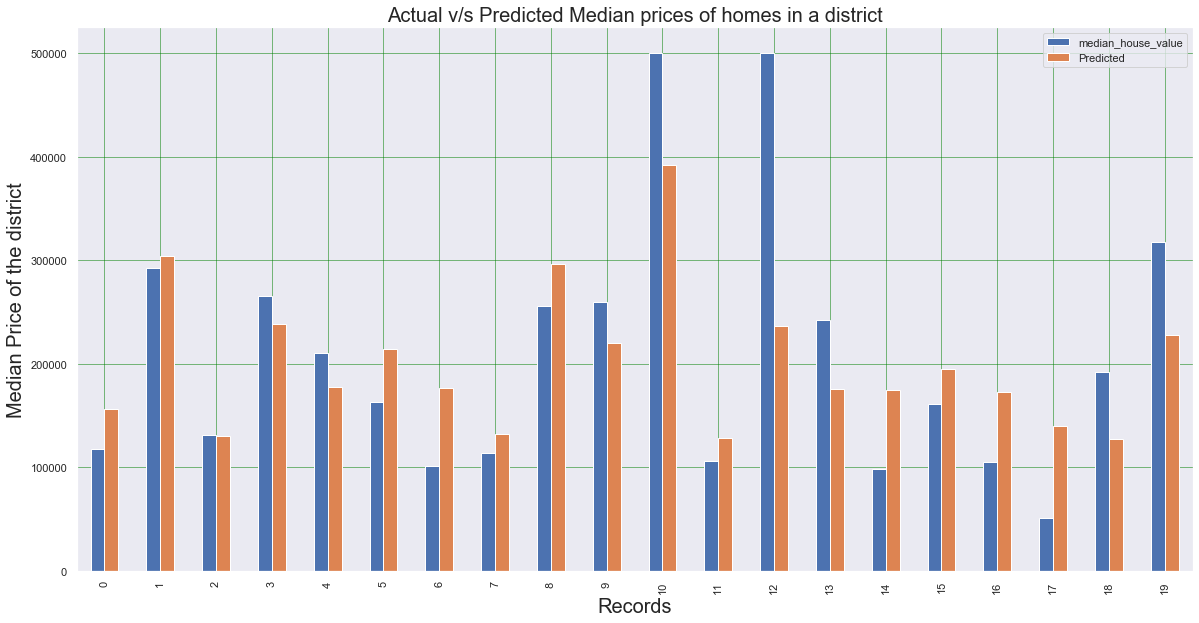

In [34]:
# Visualize the Observed and Predicted values
import matplotlib.pyplot as plt
%matplotlib inline
Observed_Predicted_Table_Split_MI = Observed_Predicted_Table_MI.head(20)
Observed_Predicted_Table_Split_MI.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Records",  fontdict = {'fontsize' : 20})
plt.ylabel("Median Price of the district",  fontdict = {'fontsize' : 20})
plt.title("Actual v/s Predicted Median prices of homes in a district",  fontdict = {'fontsize' : 20})
plt.show()

In [35]:
# Find the Root Mean Squared Error
from sklearn.metrics import mean_squared_error
rmse_mi = np.sqrt(mean_squared_error(y_test, y_predicted_median_income))
rmse_mi

84351.50568485045

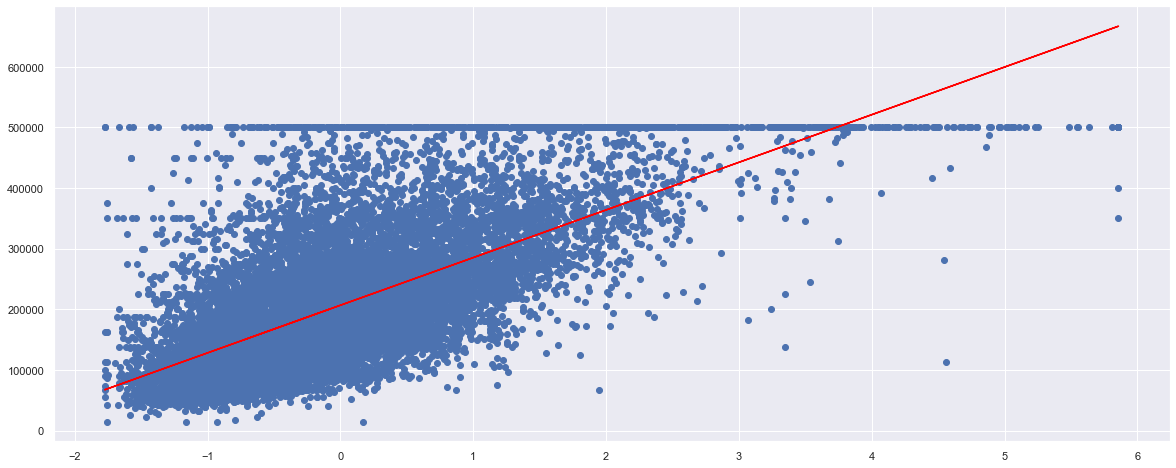

In [36]:
#Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.
plt.figure(figsize=(20,8))
plt.scatter(x_train_median_income,y_train)
plt.plot(x_train_median_income,classifier.predict(x_train_median_income),color='red')
plt.show()

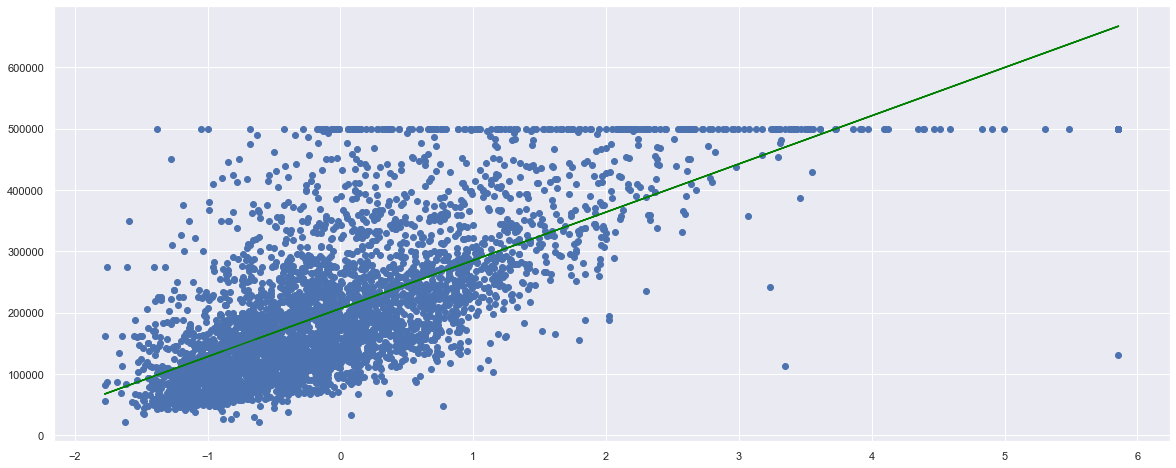

In [37]:
plt.figure(figsize=(20,8))
plt.scatter(x_test_median_income,y_test)
plt.plot(x_test_median_income,classifier.predict(x_test_median_income),color='green')
plt.show()